# Topological Data Analysis
Matias Ollu, Yuguang Yao

## Abstact
This repository aims at presenting our results to solve the problem of the project of topological data analysis in CSC_42021_EP - Conception et analyse d'algorithmes (2024-2025) of the école Polytechnique. We present an alogrithm that computes the simplexes and the filtration valuse of a given $\alpha$-complex or Čech-complex of an arbitary point-set. 

We devolepped an alogrithm that is general enough to calculate the circumcircle of $n$ points in $d$-dimension euclidean space.

## Environment
We use the following packages:

In [2]:
import random
import numpy as np
from itertools import combinations

## $\alpha$-complex and Čech-complex

(À completer, les définitions strict et les theoremes utilisées, réference: https://courses.cs.duke.edu/fall06/cps296.1/)

We will firstly define the key concepts and give the theorem that we are going to use. And we will forlulize our problems formly.

* Define 1: 

## Task 1

>Task 1. Implement the computation of the minimal enclosing ball (MEB)
>of a set of points using one (or more) of the algorithms from https:// en.
>wikipedia.org/ wiki/ LP-type_problem.

We defined a class of Sphere(center,radius), and used the alogithm of Weltz(LP-Problem) to solve the MEB quetion.

We solved solve for the circumcircle of $n$ points in $d$-dimension euclidean space.

The Weltz algorithm uses the circumcirle to find the MEB

In [3]:
# This class is used to represent a sphere.
class Sphere:
    def __init__(self, center, radius):
        self.center = np.array(center)
        self.radius = radius

    


    def contains(self, point, tol=1e-9):
        """Check if the sphere contains the given point with tolerance for float imprecision."""
        return np.linalg.norm(self.center - np.array(point)) <= self.radius + tol

    def contains_strict(self, point, tol=1e-9):
        """Check if the sphere strictly contains the given point with tolerance for float imprecision."""
        norme = np.linalg.norm(self.center - np.array(point))
        return not (np.isclose(norme, self.radius, atol=tol) or norme > self.radius + tol)
    
    
    def onradius(self,point):
        """Check if the point is on the sphere"""
        return np.isclose(np.linalg.norm(self.center - np.array(point)),self.radius)

Here, we find the equations allowing to compute the circumcircle of a given number of nppoints under the condition $n\leq d+1$.

In practice, this condition always holds as a simplex is only defined for maximum d points.


Let $P_i^n$ be the $i$-ième coordinate of point $P^n$ in a set of $N$-points in $d$-dimensions  satisfying $1 \leq n \leq N \leq d+1$. Let $c$ the center of the circumcircle be a weighted average of the $N$ points: $c=\sum_n k_n P^{n0}$. 

Then the center of the circumcile satisfies, for $n,m\in[1,n]\cap Z$:

$$|c-P^n|=|c-P^m| $$
$$\sum_i (c_i-P_i^n)^2-(n\to m)=0 $$
$$\sum_i (P_i^n)^2+2P_i^nc_i-(n\to m)=0 $$
$$\sum_i ((P_i^n)^2-(P_i^m)^2)=\sum_l (P_i^{l0}\sum_i 2(P_i^n-P_i^m)) k_l  $$
$$|P^n|-|P^m|=\sum_l (P_i^{l0}\sum_i 2(P_i^n-P_i^m)) k_l  .$$

In our implementation, we set $m=0$
$$|P^n|-|P^0|=\sum_l (2P_i^l\sum_i (P_i^n-P_i^0)) k_l  $$

$$A_{mn}=2P^{m0} \cdot P^{n0} $$
$$b_n=|P^n|-|P^0|.$$

This is a linear system with $n-1$ équations and $n-1$ variables. 

After having solved the equation, we compute  $c=\sum_n k_n P^{n0}$ as $c=k \cdot P+P^0$.

In [ ]:
def make_sphere_n_points(points):
    """
     Finds the minimal circumcircle in the d-dimensional space for n points (n <= d+1).
    
    When utilising this method, we assume that the points are not colinear and that the dimension is at least 2.

    Params :
        points: np.ndarray, shape (n, d)
    Returns :
        Sphere
    """

    nppoints = np.array(points, dtype=float)

    if len(points) > nppoints.shape[1] + 1:
        raise ValueError("Number of points must be less than or equal to the dimension of the space plus one.")

    if len(points) == 0:
        print("No points given in circumcircle calculation")
        raise None
    if len(points) == 1:
        return Sphere(center=points[0], radius=0) 
    if len(points) == 2:
        return Sphere(center=(nppoints[0]+nppoints[1])/2, radius=np.linalg.norm(nppoints[0]-nppoints[1])/2)
    
    #print("nppoints shape:", nppoints.shape)

    # Calcul de la matrice A et du vecteur b
    diffs = nppoints[1:] - nppoints[0]  # Différences (P^n - P^0) pour n = 1, ..., N-1
    #print("diffs shape:", diffs.shape)

    A = 2 * np.dot(diffs, diffs.T)  # Matrice A
    b = np.sum(diffs ** 2, axis=1)  # Vecteur b

    # Résolution du système linéaire pour trouver les coefficients k
    k = np.linalg.solve(A, b)

    # Calculer le centre
    center = nppoints[0] + np.dot(k, diffs)

    # Calculer le rayon
    radius = np.linalg.norm(center - nppoints[0])

    # Retourner une instance de Sphere
    return Sphere(center=center, radius=radius)

In [5]:
def trivial(R):
    """Find the minimal sphere for 0, 1 or mores points."""
    if not R:
        return Sphere([0, 0, 0], 0)
    elif len(R) == 1:
        return Sphere(R[0], 0)
    elif len(R) >= 1:
        return make_sphere_n_points(R)

def welzl(P, R):
    """Recursive implementation of Welzl's algorithm for 3D."""
    if not P or len(R) == len(P[0])+   1 :
        return trivial(R)

    p = P.pop(random.randint(0, len(P) - 1))
    D = welzl(P, R)

    if D.contains(p):
        P.append(p)
        return D

    result = welzl(P, R + [p])
    P.append(p)
    return result

def minimal_enclosing_sphere(points):
    """Compute the minimal enclosing sphere for a set of points."""
    points = points[:]
    random.shuffle(points)
    return welzl(points, [])

In [6]:
def test_task1():
    """Test cases for minimal enclosing sphere."""
    # Test 1: Single point
    points = [(0, 0, 0)]
    sphere = minimal_enclosing_sphere(points)
    assert np.allclose(sphere.center, [0, 0, 0])
    assert np.isclose(sphere.radius, 0)
    print("Test 1.1 passed!")

    # Test 2: Two points
    points = [(0, 0, 0), (2, 0, 0)]
    sphere = minimal_enclosing_sphere(points)
    assert np.allclose(sphere.center, [1, 0, 0])
    assert np.isclose(sphere.radius, 1)
    print("Test 1.2 passed!")

    # Test 3: Three points
    points = [(-10, 0, 0), (10, 0, 0), (0, 1, 0)]
    sphere = minimal_enclosing_sphere(points)
    assert np.allclose(sphere.center, [0, 0, 0])
    assert np.isclose(sphere.radius, 10)
    print("Test 1.3 passed!")

    # Test 4: Four points
    points = [(5, 0, 1), (-1, -3, 4), (-1, -4, -3), (-1, 4, -3)]
    sphere =  minimal_enclosing_sphere(points)
    assert np.allclose(sphere.center, [0, 0, 0])
    assert np.isclose(sphere.radius, np.sqrt(26))
    print("Test 1.4 passed!")

    print("All test cases passed!")

test_task1()

Test 1.1 passed!
Test 1.2 passed!
Test 1.3 passed!
Test 1.4 passed!
All test cases passed!


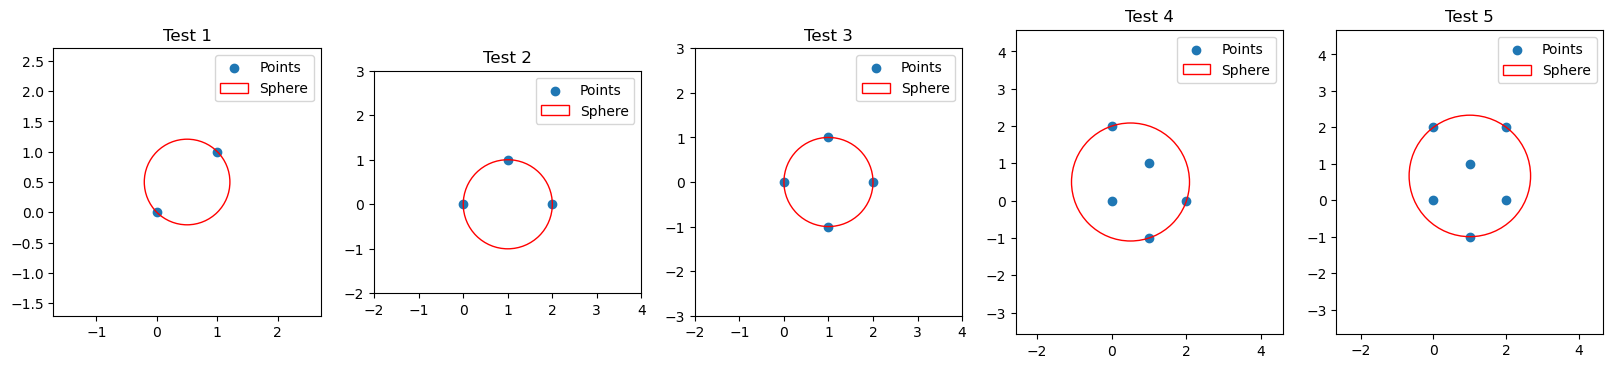

In [7]:
#test en dim 2

import matplotlib.pyplot as plt

def plot_points_sphere(points, sphere, ax):
    """Plot the points and the minimal enclosing sphere."""
    points = np.array(points)
    ax.scatter(points[:, 0], points[:, 1], label='Points')
    
    circle = plt.Circle(sphere.center[:2], sphere.radius, color='r', fill=False, label='Sphere')
    ax.add_artist(circle)
    
    ax.set_xlim(min(points[:, 0]) - sphere.radius - 1, max(points[:, 0]) + sphere.radius + 1)
    ax.set_ylim(min(points[:, 1]) - sphere.radius - 1, max(points[:, 1]) + sphere.radius + 1)
    ax.set_aspect('equal', 'box')
    ax.legend()

def test_and_plot_minimal_enclosing_sphere():
    """Generate 5 tests with different points in 3 dimensions and plot the results."""
    test_cases = [
        [(0, 0, 0), (1, 1, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0), (1, -1, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0), (1, -1, 0), (0, 2, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0), (1, -1, 0), (0, 2, 0), (2, 2, 0)]
    ]
    
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    
    for i, points in enumerate(test_cases):
        sphere = minimal_enclosing_sphere(points)
        plot_points_sphere(points, sphere, axs[i])
        axs[i].set_title(f'Test {i+1}')
    
    plt.show()

test_and_plot_minimal_enclosing_sphere()

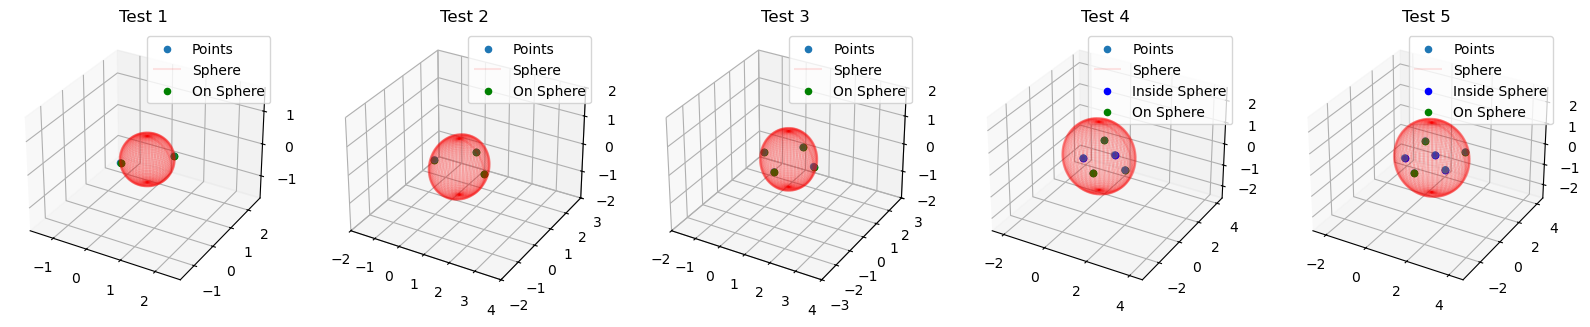

In [8]:
#Test en dimension 3

from mpl_toolkits.mplot3d import Axes3D

def plot_points_sphere_3d(points, sphere, ax):
    """Plot the points and the minimal enclosing sphere in 3D."""
    points = np.array(points)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], label='Points')
    
    # Create a sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x = sphere.center[0] + sphere.radius * np.cos(u) * np.sin(v)
    y = sphere.center[1] + sphere.radius * np.sin(u) * np.sin(v)
    z = sphere.center[2] + sphere.radius * np.cos(v)
    
    ax.plot_wireframe(x, y, z, color='r', alpha=0.1, label='Sphere')
    
    ax.set_xlim(min(points[:, 0]) - sphere.radius - 1, max(points[:, 0]) + sphere.radius + 1)
    ax.set_ylim(min(points[:, 1]) - sphere.radius - 1, max(points[:, 1]) + sphere.radius + 1)
    ax.set_zlim(min(points[:, 2]) - sphere.radius - 1, max(points[:, 2]) + sphere.radius + 1)
    ax.set_aspect('auto')
    
    for point in points:
        if sphere.contains(point):
            if sphere.onradius(point):
                ax.scatter(point[0], point[1], point[2], color='g', label='On Sphere')
            else:
                ax.scatter(point[0], point[1], point[2], color='b', label='Inside Sphere')
        else:
            ax.scatter(point[0], point[1], point[2], color='r', label='Outside Sphere')
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

def test_and_plot_minimal_enclosing_sphere_3d():
    """Generate 5 tests with different points in 3 dimensions and plot the results."""
    test_cases = [
        [(0, 0, 0), (1, 1, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0), (1, -1, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0), (1, -1, 0), (0, 2, 0)],
        [(0, 0, 0), (2, 0, 0), (1, 1, 0), (1, -1, 0), (0, 2, 0), (2, 2, 0)]
    ]
    
    fig = plt.figure(figsize=(20, 4))
    
    for i, points in enumerate(test_cases):
        ax = fig.add_subplot(1, 5, i+1, projection='3d')
        sphere = minimal_enclosing_sphere(points)
        plot_points_sphere_3d(points, sphere, ax)
        ax.set_title(f'Test {i+1}')
        
        for point in points:
            if sphere.contains(point):
                if sphere.onradius(point):
                    ax.scatter(point[0], point[1], point[2], color='g', label='On Sphere')
                else:
                    ax.scatter(point[0], point[1], point[2], color='b', label='Inside Sphere')
            else:
                ax.scatter(point[0], point[1], point[2], color='r', label='Outside Sphere')
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    if any(not sphere.contains(point) for point in points):
        print("Warning: There are points outside the minimal enclosing sphere.")
    plt.show()

test_and_plot_minimal_enclosing_sphere_3d()

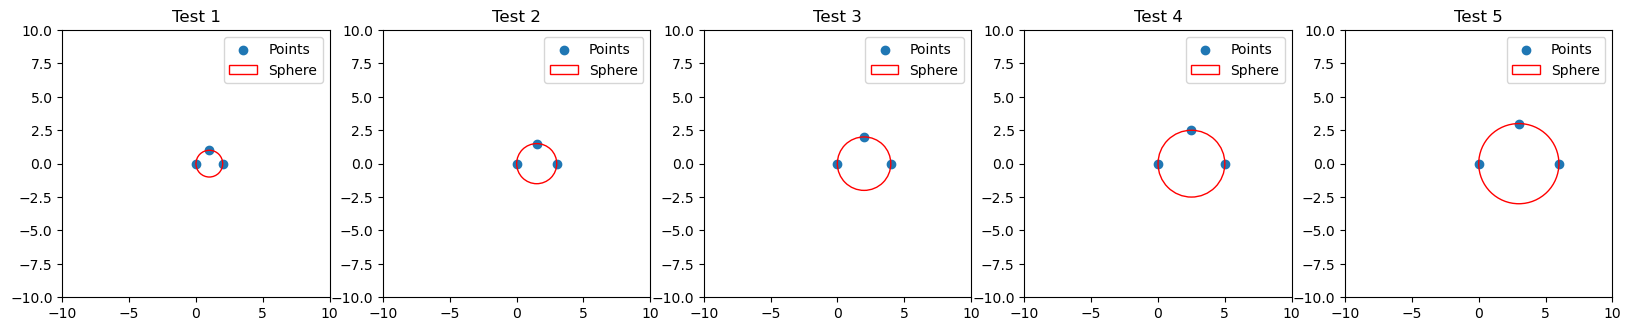

In [9]:
#test circumsphere:
test_cases = [
    [(0, 0, 0), (2, 0, 0), (1, 1, 0)],
    [(0, 0, 0), (3, 0, 0), (1.5, 1.5, 0)],
    [(0, 0, 0), (4, 0, 0), (2, 2, 0)],
    [(0, 0, 0), (5, 0, 0), (2.5, 2.5, 0)],
    [(0, 0, 0), (6, 0, 0), (3, 3, 0)]
]

fig, axs = plt.subplots(1, len(test_cases), figsize=(20, 4))

for i, points in enumerate(test_cases):
        sphere = make_sphere_n_points(points)
        plot_points_sphere(points, sphere, axs[i])
        axs[i].set_title(f'Test {i+1}')
        for ax in axs:
            ax.set_xlim(-10, 10)
            ax.set_ylim(-10, 10)
            ax.set_aspect('equal', 'box')
plt.show()

## Task 2

>Given a set of n points in $R^d$, implement a naive algorithm that enumerates the simplexes of $C^k$ and their filtration value

In [10]:

def task2(points,emu):
    """Compute the filtration value for the points in emu"""
    points_chosen = [points[i] for i in emu]
    filtration = minimal_enclosing_sphere(points_chosen).radius

    return filtration

def enum_simplex2(points):
    "Enumerates the simplexes and their filtration values"
    parties= [] #on fait la liste des sous ensembles de points:

    i, imax = 0, 2**len(points)-1 #We construct and iterator. The points in the subsets are the ones for which the corresponding bit is 1
    while i <= imax:
        s = []
        j, jmax = 0, len(points)-1
        while j <= jmax:
            if (i>>j)&1 == 1:
                s.append(points[j])
            j += 1
        parties.append(s)
        i += 1 

    #print the filtration values and subsets:
    for enum in parties:
        filtration = task2(points,enum)
        print(f"({enum}) -> {filtration}")

In [11]:
def test_task2():
    P = [(5, 0, 1), (-1, -3, 4), (-1, -4, -3), (-1, 4, -3)]

    test_cases = [
        ([0], 0),
        ([1], 0),
        ([2], 0),
        ([3], 0),
        ([2, 1], 3.53553),
        ([1, 0], 3.67425),
        ([3, 2], 4),
        ([2, 0], 4.12311),
        ([3, 0], 4.12311),
        ([2, 1, 0], 4.39525),
        ([3, 2, 0], 4.71495),
        ([3, 1], 4.94975),
        ([3, 2, 1], 5),
        ([3, 1, 0], 5.04975),
        ([3, 2, 1, 0], 5.09902),
    ]

    for enu, expected in test_cases:
        assert np.allclose(task2(P, enu), expected), f"Test({enu}) failed!"
        print(f"Test({enu}) passed!")


test_task2()

Test([0]) passed!
Test([1]) passed!
Test([2]) passed!
Test([3]) passed!
Test([2, 1]) passed!
Test([1, 0]) passed!
Test([3, 2]) passed!
Test([2, 0]) passed!
Test([3, 0]) passed!
Test([2, 1, 0]) passed!
Test([3, 2, 0]) passed!
Test([3, 1]) passed!
Test([3, 2, 1]) passed!
Test([3, 1, 0]) passed!
Test([3, 2, 1, 0]) passed!


## Task 3

>Reuse the LP-type algorithm with new parameters in order to determine
if a simplex is in the α-complex and its filtration value. Note that this is less
standard than for the MEB, you need to explain how this new problem fits in
the framework.

Why problem fits in framework:


Why the solution for points on the frontier works

In [ ]:
from itertools import combinations
from concurrent.futures import ProcessPoolExecutor

def enum3(n):
    """Generates all subsets of indices for a given number of points"""
    return (comb for k in range(1, n + 1) for comb in combinations(range(n), k))

def compute_meb(args):
    """Helper function to compute the minimal enclosing sphere"""
    points, indices = args
    subset_points = [points[idx] for idx in indices]
    return indices, minimal_enclosing_sphere(subset_points)

from concurrent.futures import ThreadPoolExecutor

def task3(points, l, printit=False):
    n = len(points)
    IsSimplex = {(i,): 1 for i in range(n)}
    simplex = {(i,): Sphere(points[i], 0) for i in range(n)}

    tasks = []
    for current_simplex in enum3(n - 1):
        for k in range(n):
            if k in current_simplex:
                continue
            
            pn = tuple(sorted(current_simplex + (k,)))
            if pn in simplex:
                continue
            
            tasks.append((points, pn))

    with ThreadPoolExecutor() as executor:  # Use threads instead of processes
        results = executor.map(compute_meb, tasks)

    for pn, MEB in results:
        if MEB.radius < l:
            simplex[pn] = MEB
            IsSimplex[pn] = 1
        else:
            IsSimplex[pn] = 0

    if printit:
        for key, value in simplex.items():
            print(f"{key} -> {value.radius}")

    return simplex

In [21]:
def test_task3_simple():
    P = [(5, 0, 1), (-1, -3, 4), (-1, -4, -3), (-1, 4, -3)]
    for i in [0,4,5,100]:
        print(f"-------------------filtration={i}-------------------")
        task3(P, i, printit = True)

test_task3_simple()

-------------------filtration=0-------------------
(0,) -> 0
(1,) -> 0
(2,) -> 0
(3,) -> 0
-------------------filtration=4-------------------
(0,) -> 0
(1,) -> 0
(2,) -> 0
(3,) -> 0
(0, 1) -> 3.6742346141747673
(1, 2) -> 3.5355339059327378
-------------------filtration=5-------------------
(0,) -> 0
(1,) -> 0
(2,) -> 0
(3,) -> 0
(0, 1) -> 3.6742346141747673
(0, 2) -> 4.123105625617661
(0, 3) -> 4.123105625617661
(1, 2) -> 3.5355339059327378
(1, 3) -> 4.949747468305833
(2, 3) -> 4.0
(0, 1, 2) -> 4.395245364957662
(0, 2, 3) -> 4.714951667914447
-------------------filtration=100-------------------
(0,) -> 0
(1,) -> 0
(2,) -> 0
(3,) -> 0
(0, 1) -> 3.6742346141747673
(0, 2) -> 4.123105625617661
(0, 3) -> 4.123105625617661
(1, 2) -> 3.5355339059327378
(1, 3) -> 4.949747468305833
(2, 3) -> 4.0
(0, 1, 2) -> 4.395245364957663
(0, 1, 3) -> 5.049752469181039
(0, 2, 3) -> 4.714951667914447
(1, 2, 3) -> 5.0
(0, 1, 2, 3) -> 5.0990195135927845


In [ ]:
import time
def test_task3():
 #generate random n points in R^d:
 n=20
 print(f"n={n}")

 #d=random.randint(2,5)
 d=3
 print(f"d={d}")


 points=[list(np.random.rand(d)) for i in range(n)]
 print(f"Points: {points}")
 
 #k=random.randint(2,d)
 k=d
 print(f"k={k}")


 l=np.random.rand(0,1)
 l=3


 print(f"l={l}")
 print("----------Simplexes et filtration values--------------")
 start_time = time.time()
 task3(points,l)
 print("--- %s seconds ---" % (time.time() - start_time))
test_task3()

n=20
d=3
Points: [[0.5243429867604954, 0.971032006477474, 0.8718105220170633], [0.7498464191597717, 0.3081958000214987, 0.6807821569919972], [0.7914476142522571, 0.24224690975024643, 0.12439240607106705], [0.1428649993432859, 0.5512706695681204, 0.13601950901492277], [0.561478479183468, 0.5677369624408936, 0.8079746077359552], [0.6854151601534624, 0.7299027805176497, 0.5389991232959817], [0.3830889460565501, 0.7247604146366228, 0.10770952065988226], [0.7945725056871977, 0.2754903295261172, 0.9894093886365056], [0.49468247411161026, 0.105962681849461, 0.5779899497620008], [0.5848474295526958, 0.7962913757127276, 0.9729379577621783], [0.2504750769662206, 0.35773638415525677, 0.10779166317899735], [0.12342646928298384, 0.08554210172405141, 0.06061320760855371], [0.307842689180322, 0.549377617228786, 0.10463483547827401], [0.8273437071282119, 0.38311014571857793, 0.5755157927394685], [0.794370005219624, 0.15382088642793634, 0.18836115183143776], [0.594899246387848, 0.20306102269749038, 0.4

In [ ]:
import os
import sys
import numpy as np
import argparse

#On se propose ici d'utiliser la bibliotheque sc.py pour ploter les complexes simpliciaux

#on enregistre d'abord le complexe simplicial dans un fichier texte:

def write_simplex_and_coords_files(simplex, filtration, points,i):
    os.makedirs("complex_plot", exist_ok=True)
    with open(f"complex_plot/coor_{i}.txt", "w") as f_coords, open(f"complex_plot/cplx_{i}.txt", "w") as f_simplex:
        for point in points:
            f_coords.write(f"{point[0]} {point[1]} {point[2]}\n")
        
        for key in simplex:
            if simplex[key].radius < filtration:
                f_simplex.write(f"{' '.join(map(str, key))}\n")



In [ ]:
from IPython.display import Image, display

import os

def test_plot_complexes():
    P = [(5, 0, 1), (-1, -3, 4), (-1, -4, -3), (-1, 4, -3)]
    j=1
    for i in [0, 4, 5, 100]:
        j+=1
        print(f"-------------------filtration={i}-------------------")
        write_simplex_and_coords_files(task3(P, i), i, P,j)
        os.system("python3 sc.py --complex complex_plot/cplx.txt --coordinates complex_plot/coor.txt plot3d")
        display(Image(filename="complex_plot/plot.png"))

test_plot_complexes()



-------------------filtration=0-------------------


OSError: [Errno 30] Read-only file system: 'complex_plot'

## Task 4

>Given a set P of n points in $R^d$, implement an algorithm that enumerates the simplexes of dimension at most k and filtration value at most l of the α-complex and their filtration values.


In [ ]:
def Is_in_alpha_complex(P,R):
    """Check if the simplex R is in the alpha complex of P"""
    d = len(P[0])

    #On se borne aux d+1 premiers points qui suffisent à déterminer la sphère.
    d = len(P[0])
    if len(R) > d+1:
        R_used = R[:d+1]
    else:
        R_used = R

    circum=make_sphere_n_points(R_used)
    
    for p in P:
       if circum.contains_strict(p):
           return False, circum

    return True, circum

def filtration_value(R):
    """Compute the filtration value of the simplex R"""
    return make_sphere_n_points(R)

def task4(points,R):
    """"Reuse the LP-type algorithm with new parameters in order to determine
if a simplex is in the α-complex and its filtration value. Note that this is less
standard than for the MEB, you need to explain how this new problem fits in
the framework."""
    result, circum= Is_in_alpha_complex(points,R)
    if result:
        print(f"Simplex {R} is in the alpha complex")
        return True, circum
    else:
        print(f"Simplex {R} is not in the alpha complex")
        return False, circum

In [ ]:
def test_task4():
    P=[(0,5,0),(3,4,0),(-3,4,0)]
    R=[(0,5,0),(3,4,0),(-3,4,0)]
    print(f"---- Test for {P}")
    a= task4(P,R)
    if a[0]:
        print(f"{R} is in the  $\alpha$-complex")
        print(f"filtration value: {a[1].radius}")
        print(f"center {a[1].center}")
    else:
        print(f"{R} is not in the  $\alpha$-complex")

    P.append((0,0,4))
    R.append((0,0,4))
    print(f"---- Test for {P}")
    a= task4(P,R)
    if a[0]:
        print(f"{R} is in the alpha-complex")
        print(f"filtration value: {a[1].radius}")
        print(f"center {a[1].center}")
    else:
        print(f"{R} is not in the  alpha-complex")


    P.append((0,0,-4))
    R.append((0,0,-4))
    print(f"---- Test for {P}")
    a= task4(P,R)
    if a[0]:
        print(f"{R} is in the  alpha-complex")
        print(f"filtration value: {a[1].radius}")
        print(f"center {a[1].center}")
    else:
        print(f"{R} is not in the  alpha-complex")


test_task4()

---- Test for [(0, 5, 0), (3, 4, 0), (-3, 4, 0)]
Simplex [(0, 5, 0), (3, 4, 0), (-3, 4, 0)] is in the alpha complex
[(0, 5, 0), (3, 4, 0), (-3, 4, 0)] is in the  $lpha$-complex
filtration value: 5.000000000000001
center [ 4.4408921e-16 -8.8817842e-16  0.0000000e+00]
---- Test for [(0, 5, 0), (3, 4, 0), (-3, 4, 0), (0, 0, 4)]
Simplex [(0, 5, 0), (3, 4, 0), (-3, 4, 0), (0, 0, 4)] is in the alpha complex
[(0, 5, 0), (3, 4, 0), (-3, 4, 0), (0, 0, 4)] is in the alpha-complex
filtration value: 5.125000000000002
center [-1.77635684e-15 -1.77635684e-15 -1.12500000e+00]
---- Test for [(0, 5, 0), (3, 4, 0), (-3, 4, 0), (0, 0, 4), (0, 0, -4)]
Simplex [(0, 5, 0), (3, 4, 0), (-3, 4, 0), (0, 0, 4), (0, 0, -4)] is not in the alpha complex
[(0, 5, 0), (3, 4, 0), (-3, 4, 0), (0, 0, 4), (0, 0, -4)] is not in the  alpha-complex


Simplex [(0, 5, 0), (3, 4, 0), (-3, 4, 0)] is in the alpha complex
Simplex [(0, 5, 0), (3, 4, 0), (-3, 4, 0), (0, 0, 4)] is in the alpha complex
Simplex [(0, 5, 0), (3, 4, 0), (0, 0, 4), (0, 0, -4)] is in the alpha complex


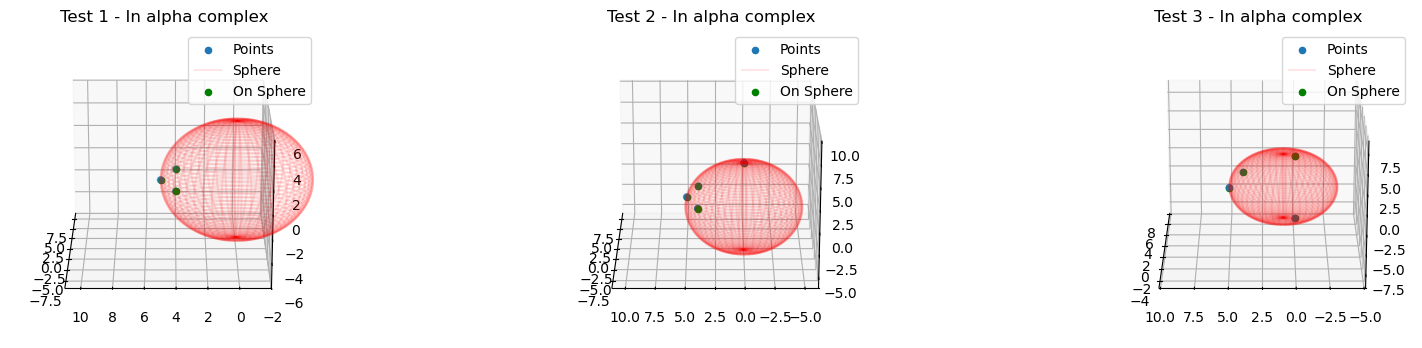

In [ ]:
# Plotting the results in 2D and 3D

test_cases=[[(0,5,0),(3,4,0),(-3,4,0)],[(0,5,0),(3,4,0),(-3,4,0),(0,0,4)],[(0,5,0),(3,4,0),(0,0,4),(0,0,-4)]]

fig, axs = plt.subplots(1, len(test_cases), figsize=(20, 4), subplot_kw={'projection': '3d'})

for i, points in enumerate(test_cases):
    ax = axs[i]
    simplex, circum = task4(points, points)
    plot_points_sphere_3d(points, circum, ax)
    if simplex:
        ax.set_title(f'Test {i+1} - In alpha complex')
    else:
        ax.set_title(f'Test {i+1} - Not in alpha complex')

# Rotate the plot for better visibility
for ax in axs.flat:
    ax.view_init(elev=20., azim=180)

plt.show()

# Task 5

In [ ]:
def task5(points,K,l):
      """ Given a set P of n points in Rd, implement an algorithm that enu-
      merates the simplexes of dimension at most k and filtration value at most l of
      the α-complex and their filtration values.""" 
      enum = enum3(points)
      print(f"enum={enum}")
      filtration_value=0
      IsSimplex = {tuple([i]): 1 for i in range(len(points))}

      simplex = {tuple([i]): Sphere(points[i], 0) for i in range(len(points))} #on initialise le premier simplexe

      for i in range(1,K):
        for j in range(len(enum[i-1])):
              
          current_simplex = enum[i][j]

          for k in range(len(points)):
                  
            if k in current_simplex:
              break
                        
            pn = current_simplex.append(k)

            is_alpha, circum = Is_in_alpha_complex(points,[points[idx] for idx in current_simplex])

            if not is_alpha:
              IsSimplex[pn] = 0
              break

            if pn in simplex:
              break

            new_simplex = [points[idx] for idx in current_simplex] + [points[k]]

            MEB = trivial(new_simplex)

            if MEB.radius < l:
              if MEB.radius > filtration_value:
                        filtration_value=MEB.radius
              simplex[pn] = MEB
              IsSimplex[pn] = 1
            else:
              IsSimplex[pn] = 0
              break

            print(f"new alpha-simplex: {pn} -> {MEB.radius} ")
      print(f"filtration value: {filtration_value}")


In [ ]:
def test_task5():
 #generate random n points in R^d:
 n=random.randint(5,10)
 print(f"n={n}")

 #d=random.randint(2,5)
 d=3
 print(f"d={d}")


 points=[list(np.random.rand(d)) for i in range(n)]
 print(f"Points: {points}")
 
 #k=random.randint(2,d)
 k=d
 print(f"k={k}")


 l=np.random.rand(0,1)
 l=3


 print(f"l={l}")
 print("----------------Alpha complex et filtration values-----------")
 task5(points,k,l)
 print("----------Simplexes et filtration values--------------")
 task3(points,l)

test_task5()


n=10
d=3
Points: [[0.47406797295058845, 0.7209489457021164, 0.7802488401996921], [0.1696677141769075, 0.37548953348222025, 0.1786519873802419], [0.39351215346573687, 0.6896482272923795, 0.043032180553561616], [0.5020385304610011, 0.0482457910571622, 0.2447433021951515], [0.9987833817695522, 0.17788536784692932, 0.6370719642218665], [0.3252256863926163, 0.3513657154906401, 0.46259859423747174], [0.4231039392547138, 0.03679542831470972, 0.42738141868158896], [0.17412895671955742, 0.05099335159745655, 0.7752392138093209], [0.10657406721233742, 0.5043361095993131, 0.8106319354092609], [0.5425746822677964, 0.4556076635904215, 0.4803724356180501]]
k=3
l=3
----------------Alpha complex et filtration values-----------
enum=[[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]], [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 4], [3, 5], [3, 6], [3, 7

In [ ]:
def task_visiulization():
    #a completer: creer des points radonnées et les afficher avec les simplexes de l'alpha complexe et leur filtration value et Cech complexe en differentes couleurs
    pass


A finir :
* task_visiulization
* la partie theorique, notamment la partie sur les cellules de voronoi.
* enum est trop couteuse $O(2^n)$ --> l'adapter pour qu'il calcule uniquement les simplexes de taille <= d+1
* dans test_task5(),task3 ne marche pas
* des explications pour chaque questions
* questionnements sur l'utilisation de contains